In [340]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [341]:
data=pd.read_csv('C:/Users/jvito/Repos - Python/datasets/New_York_Airbnb.csv')

print(data.shape)
data.head()

C:\Users\jvito\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(38277, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.99,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68,-73.96,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.69,-73.96,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66,-73.99,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76,-73.98,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


# Tratamento dos dados

In [342]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)

license                          1.00
reviews_per_month                0.25
last_review                      0.25
host_name                        0.00
name                             0.00
minimum_nights                   0.00
number_of_reviews_ltm            0.00
availability_365                 0.00
calculated_host_listings_count   0.00
number_of_reviews                0.00
id                               0.00
room_type                        0.00
longitude                        0.00
latitude                         0.00
neighbourhood                    0.00
neighbourhood_group              0.00
host_id                          0.00
price                            0.00
dtype: float64

É possível constatar que:
 
 
 -A variável license possui 100% de seus valores faltantes
 
 -25% dos dados da variável reviews_per_month e last_review estão faltando
 
Portanto, essas variáveis não serão consideradas para análise

In [343]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [344]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38277.00,38277.00,38277.00,38277.00,38277.00,38277.00,38277.00,28773.00,38277.00,38277.00,38277.00
mean,29622391.36,114830455.23,40.73,-73.95,170.86,21.62,23.30,1.72,17.75,134.29,5.03
std,17422394.08,129919366.83,0.06,0.05,305.10,29.57,50.42,4.40,59.15,143.20,14.69
min,2595.00,2438.00,40.50,-74.25,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,13410478.00,11394622.00,40.69,-73.98,70.00,3.00,1.00,0.12,1.00,0.00,0.00
50%,30812691.00,50052968.00,40.73,-73.95,114.00,30.00,4.00,0.48,1.00,73.00,0.00
75%,46428551.00,200239515.00,40.76,-73.93,189.00,30.00,20.00,1.78,3.00,302.00,3.00
max,53665099.00,434408046.00,40.91,-73.71,10000.00,1250.00,1009.00,141.00,421.00,365.00,669.00


Identificação dos Outliers:

Observando os valores descritos pela função 'describe()' é possível indentificar que as variáveis listadas abaixo possuem outliers e portanto, precisam ser tratadas, com exceção de "reviews_per_month".

Outliers:

-price

-minimum_nights

-number_of_reviews

-reviews_per_month

-calculated_host_listings_count

-number_of_reviews_ltm

In [345]:
def drop_outliers_LI (quant):
    Q1 = quant.quantile(0.25)
    Q3 = quant.quantile(0.75)
    
    LI = Q1 - (1.5*(Q3-Q1))
    
    
    return LI


def drop_outliers_LS (quant):
    Q1 = quant.quantile(0.25)
    Q3 = quant.quantile(0.75)
    
    LS = Q1 + (1.5*(Q3-Q1))
   
    return LS


def groupby_graph_sum (index0, index1):
    df=pd.DataFrame({'index0': [],
                     'index1': []})
    
    df['index0']=index0
    df['index1']=index1
    
    print(df.groupby(['index1'])['index0'].sum().plot(kind='bar', color="orange"));
    plt.xticks(rotation=60);
    
    return 0

def heat_map(inform):
    
    correlation = inform.corr()
    f, ax = plt.subplots(figsize=(10, 6))
    return sns.heatmap(correlation,cmap="YlGnBu", fmt='.2f', square='true', linecolor='white', linewidths=.5, ax=ax, annot=True);

def groupby_function_sum (index0, index1):
    df=pd.DataFrame({'index0': [],
                     'index1': []})
    
    df['index0']=index0
    df['index1']=index1
    
    table= df[['index0', 'index1']].groupby('index1').sum().reset_index()

    return table.sort_values(by='index0', ascending=False, ignore_index=True)


def groupby_function_count (index0, index1):
    df=pd.DataFrame({'index0': [],
                     'index1': []})
    
    df['index0']=index0
    df['index1']=index1
    
    table= df[['index0', 'index1']].groupby('index1').count().reset_index()

    return table.sort_values(by='index0', ascending=False, ignore_index=True)


In [346]:
data_clean = data.copy()

In [347]:
LS = drop_outliers_LS(data['price'])
data_clean.drop(data_clean[data_clean.price>LS].index, axis=0, inplace=True)

In [348]:
LS = drop_outliers_LS(data['minimum_nights'])
data_clean.drop(data_clean[data_clean.minimum_nights>LS].index, axis=0, inplace=True)

In [349]:
LS = drop_outliers_LS(data['number_of_reviews'])
data_clean.drop(data_clean[data_clean.number_of_reviews>LS].index, axis=0, inplace=True)

In [350]:
LS = drop_outliers_LS(data['calculated_host_listings_count'])
data_clean.drop(data_clean[data_clean.calculated_host_listings_count>LS].index, axis=0, inplace=True)

In [351]:
LS = drop_outliers_LS(data['number_of_reviews_ltm'])
data_clean.drop(data_clean[data_clean.number_of_reviews_ltm>LS].index, axis=0, inplace=True)

In [352]:
data_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17170.00,17170.00,17170.00,17170.00,17170.00,17170.00,17170.00,12259.00,17170.00,17170.00,17170.00
mean,26136031.28,87571671.57,40.73,-73.95,107.15,23.18,4.62,0.32,1.34,75.52,0.37
std,16540535.55,112888153.11,0.06,0.05,52.66,11.60,6.44,0.62,0.73,124.60,0.90
min,6872.00,2600.00,40.50,-74.25,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,10564947.50,9748182.75,40.69,-73.98,65.00,14.00,0.00,0.05,1.00,0.00,0.00
50%,23613043.00,34741805.00,40.72,-73.95,99.00,30.00,2.00,0.14,1.00,0.00,0.00
75%,40894466.00,124316621.75,40.76,-73.93,149.00,30.00,6.00,0.34,1.00,103.75,0.00
max,53660977.00,434408046.00,40.91,-73.71,248.00,43.00,29.00,19.00,4.00,365.00,4.00


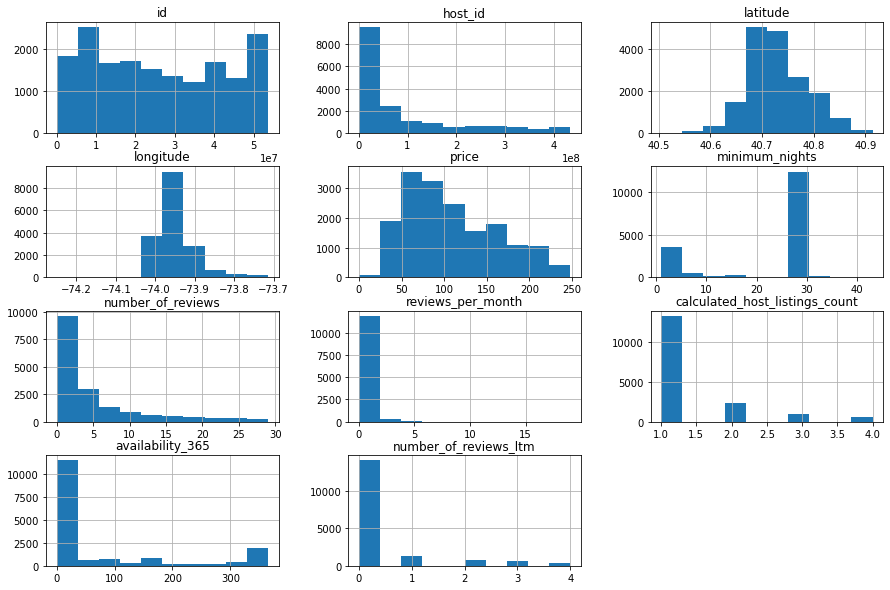

In [379]:
data_clean.hist(bins=10, figsize=(15,10));

# Correlação das variáveis

De acordo com o mapa de calor abaixo, é possível verificar que as variáveis possuem pouca correlação entre si. No entanto, algumas análises e perguntas de negócio podem ser respondidas, conforme é feito adiante.

<AxesSubplot:>

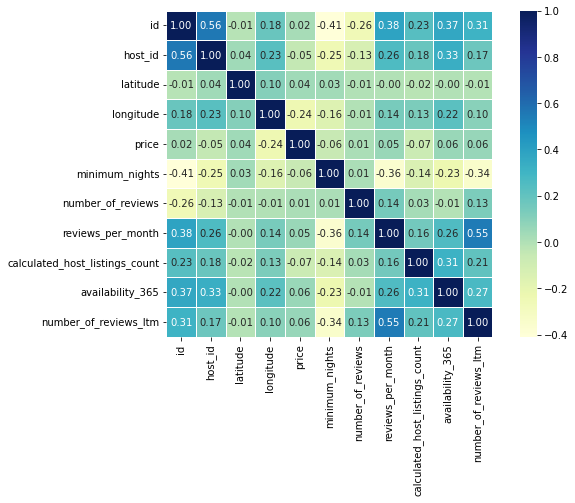

In [354]:
heat_map(data_clean)

# Em qual bairro estão situados os imóveis de hosts mais alugados?

AxesSubplot(0.125,0.125;0.775x0.755)


0

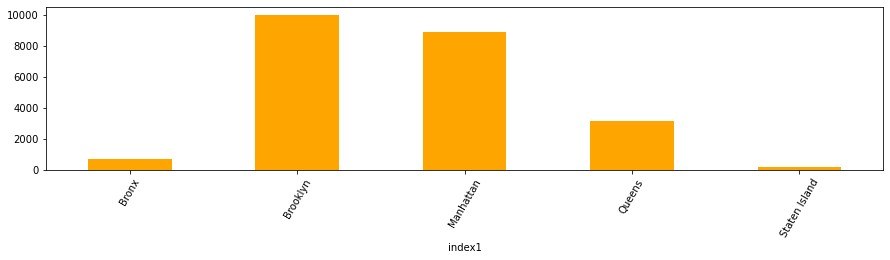

In [355]:
groupby_graph_sum(data_clean['calculated_host_listings_count'],data_clean['neighbourhood_group'])

# Há bairros com concentração de preços? Isso está relacionado a disponibilidade de dias por ano?

In [356]:
media_dispon = pd.DataFrame({'Bairro': [],
                             'Imóveis': [],
                             'Disponibilidade': [],
                             'Disponibilidade_media': [],
                             'perc_disp': []})

media_dispon[['Bairro', 'Imóveis']]=groupby_function_count(data_clean['host_id'],data_clean['neighbourhood_group'])
media_dispon[['Bairro', 'Disponibilidade']]=groupby_function_sum(data_clean['availability_365'],data_clean['neighbourhood_group'])

media_dispon['Disponibilidade_media'] = media_dispon['Disponibilidade']/media_dispon['Imóveis']

media_dispon['perc_disp'] = (media_dispon['Disponibilidade_media']/365)*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

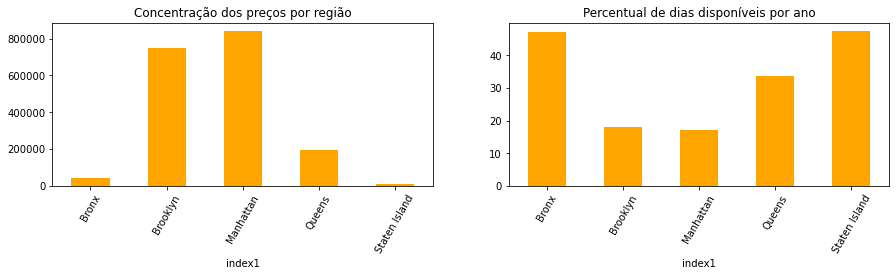

In [357]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Concentração dos preços por região')
groupby_graph_sum(data_clean['price'],data_clean['neighbourhood_group'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por ano')
groupby_graph_sum(media_dispon['perc_disp'],media_dispon['Bairro'])

De acordo com os gráficos, é possível perceber que há concentração de preços principalmente nas regiões de Manhattan e Brooklyn, enquanto nessas duas regiões, o percentual de dias disponíveis para alugar os imóveis tende a ser menor. O contrário ocorre com as regiões de Staten Island e Bronx, no qual há pouca concentração de preços e o percentual de dias disponíveis para locação é maior.

# Tipo de imóvel preferido pelos hóspedes

# Brooklyn

In [358]:
Brooklyn=data_clean.loc[data_clean.neighbourhood_group=='Brooklyn', :]

In [359]:
Brooklyn_analysis=pd.DataFrame({'room_type': [],
                                'qty_room_type': [],
                                'available_days': [],
                                'room_available': [],
                                'perc_room_type': [],
                                'perc_days': []})

Brooklyn_analysis['room_type']=Brooklyn['room_type'].unique()
Brooklyn_analysis[['room_type', 'qty_room_type']] = groupby_function_count(Brooklyn['id'],Brooklyn['room_type'])
Brooklyn_analysis[['room_type', 'available_days']]=groupby_function_sum(Brooklyn['availability_365'], Brooklyn['room_type'])
Brooklyn_analysis['room_available']=(Brooklyn_analysis['available_days'])/(Brooklyn_analysis['qty_room_type'])
Brooklyn_analysis['perc_room_type']=(Brooklyn_analysis['qty_room_type']/(Brooklyn_analysis['qty_room_type'].sum()))*100
Brooklyn_analysis['perc_days']=(Brooklyn_analysis['available_days']/(Brooklyn_analysis['available_days'].sum()))*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

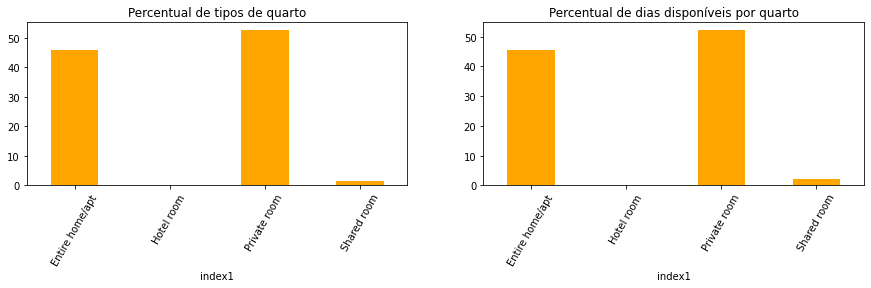

In [360]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Percentual de tipos de quarto')
groupby_graph_sum(Brooklyn_analysis['perc_room_type'],Brooklyn_analysis['room_type'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por quarto')
groupby_graph_sum(Brooklyn_analysis['perc_days'],Brooklyn_analysis['room_type'])

In [361]:
Brooklyn_analysis

,room_type,qty_room_type,available_days,room_available,perc_room_type,perc_days
0,Private room,4000,263775,65.94,52.62,52.27
1,Entire home/apt,3491,229580,65.76,45.92,45.50
2,Shared room,108,11237,104.05,1.42,2.23
3,Hotel room,3,0,0.00,0.04,0.00


# Manhattan

In [362]:
Manhattan=data_clean.loc[data_clean.neighbourhood_group=='Manhattan', :]

In [363]:
Manhattan_analysis=pd.DataFrame({'room_type': [],
                                'qty_room_type': [],
                                'available_days': [],
                                'room_available': [],
                                'perc_room_type': [],
                                'perc_days': []})

Manhattan_analysis['room_type']=Manhattan['room_type'].unique()
Manhattan_analysis[['room_type', 'qty_room_type']] = groupby_function_count(Manhattan['id'],Manhattan['room_type'])
Manhattan_analysis[['room_type', 'available_days']]=groupby_function_sum(Manhattan['availability_365'], Manhattan['room_type'])
Manhattan_analysis['room_available']=(Manhattan_analysis['available_days'])/(Manhattan_analysis['qty_room_type'])
Manhattan_analysis['perc_room_type']=(Manhattan_analysis['qty_room_type']/(Manhattan_analysis['qty_room_type'].sum()))*100
Manhattan_analysis['perc_days']=(Manhattan_analysis['available_days']/(Manhattan_analysis['available_days'].sum()))*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

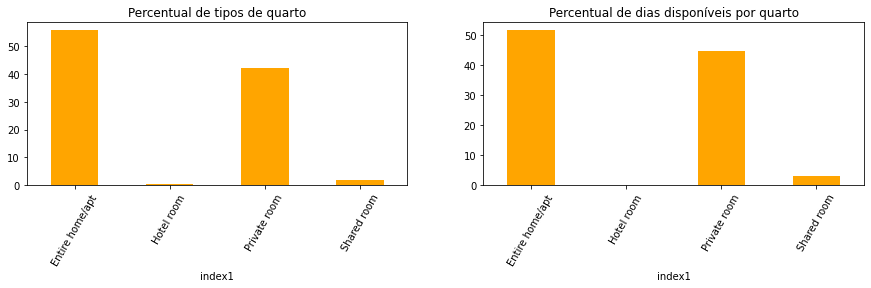

In [364]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Percentual de tipos de quarto')
groupby_graph_sum(Manhattan_analysis['perc_room_type'],Manhattan_analysis['room_type'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por quarto')
groupby_graph_sum(Manhattan_analysis['perc_days'],Manhattan_analysis['room_type'])

In [365]:
Manhattan_analysis

,room_type,qty_room_type,available_days,room_available,perc_room_type,perc_days
0,Entire home/apt,3798,219783,57.87,55.68,51.81
1,Private room,2879,189883,65.95,42.21,44.76
2,Shared room,121,13557,112.04,1.77,3.20
3,Hotel room,23,1010,43.91,0.34,0.24


# Queens

In [366]:
Queens=data_clean.loc[data_clean.neighbourhood_group=='Queens', :]

In [367]:
Queens_analysis=pd.DataFrame({'room_type': [],
                                'qty_room_type': [],
                                'available_days': [],
                                'room_available': [],
                                'perc_room_type': [],
                                'perc_days': []})

Queens_analysis['room_type']=Queens['room_type'].unique()
Queens_analysis[['room_type', 'qty_room_type']] = groupby_function_count(Queens['id'],Queens['room_type'])
Queens_analysis[['room_type', 'available_days']]=groupby_function_sum(Queens['availability_365'], Queens['room_type'])
Queens_analysis['room_available']=(Queens_analysis['available_days'])/(Queens_analysis['qty_room_type'])
Queens_analysis['perc_room_type']=(Queens_analysis['qty_room_type']/(Queens_analysis['qty_room_type'].sum()))*100
Queens_analysis['perc_days']=(Queens_analysis['available_days']/(Queens_analysis['available_days'].sum()))*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

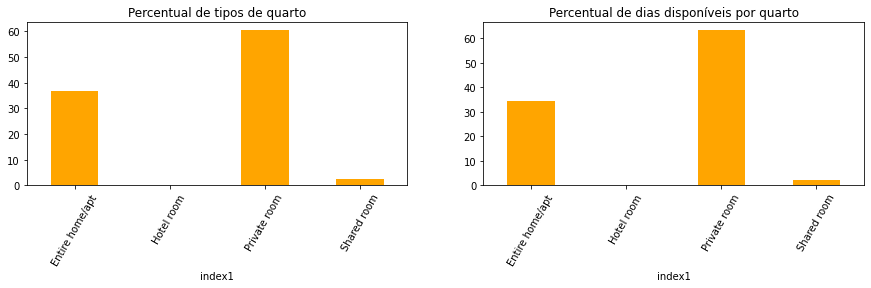

In [368]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Percentual de tipos de quarto')
groupby_graph_sum(Queens_analysis['perc_room_type'],Queens_analysis['room_type'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por quarto')
groupby_graph_sum(Queens_analysis['perc_days'],Queens_analysis['room_type'])

In [369]:
Queens_analysis

,room_type,qty_room_type,available_days,room_available,perc_room_type,perc_days
0,Private room,1297,166758,128.57,60.55,63.32
1,Entire home/apt,790,90240,114.23,36.88,34.27
2,Shared room,53,5650,106.60,2.47,2.15
3,Hotel room,2,711,355.50,0.09,0.27


# Bronx

In [370]:
Bronx=data_clean.loc[data_clean.neighbourhood_group=='Bronx', :]

In [371]:
Bronx_analysis=pd.DataFrame({'room_type': [],
                                'qty_room_type': [],
                                'available_days': [],
                                'room_available': [],
                                'perc_room_type': [],
                                'perc_days': []})

Bronx_analysis['room_type']=Bronx['room_type'].unique()
Bronx_analysis[['room_type', 'qty_room_type']] = groupby_function_count(Bronx['id'],Bronx['room_type'])
Bronx_analysis[['room_type', 'available_days']]=groupby_function_sum(Bronx['availability_365'], Bronx['room_type'])
Bronx_analysis['room_available']=(Bronx_analysis['available_days'])/(Bronx_analysis['qty_room_type'])
Bronx_analysis['perc_room_type']=(Bronx_analysis['qty_room_type']/(Bronx_analysis['qty_room_type'].sum()))*100
Bronx_analysis['perc_days']=(Bronx_analysis['available_days']/(Bronx_analysis['available_days'].sum()))*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

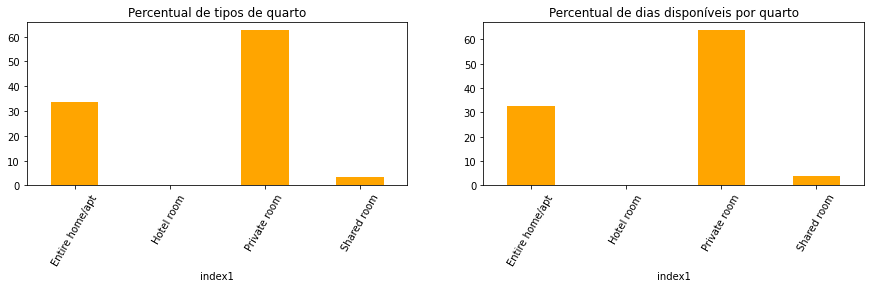

In [372]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Percentual de tipos de quarto')
groupby_graph_sum(Bronx_analysis['perc_room_type'],Bronx_analysis['room_type'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por quarto')
groupby_graph_sum(Bronx_analysis['perc_days'],Bronx_analysis['room_type'])

In [373]:
Bronx_analysis

,room_type,qty_room_type,available_days,room_available,perc_room_type,perc_days
0,Private room,311,54655,175.74,62.70,63.83
1,Entire home/apt,167,27854,166.79,33.67,32.53
2,Shared room,17,3111,183.00,3.43,3.63
3,Hotel room,1,0,0.00,0.20,0.00


# Staten Island

In [374]:
Staten_island=data_clean.loc[data_clean.neighbourhood_group=='Staten Island', :]

In [375]:
Staten_island_analysis=pd.DataFrame({'room_type': [],
                                'qty_room_type': [],
                                'available_days': [],
                                'room_available': [],
                                'perc_room_type': [],
                                'perc_days': []})

Staten_island_analysis['room_type']=Bronx['room_type'].unique()
Staten_island_analysis[['room_type', 'qty_room_type']] = groupby_function_count(Staten_island['id'],Staten_island['room_type'])
Staten_island_analysis[['room_type', 'available_days']]=groupby_function_sum(Staten_island['availability_365'], Staten_island['room_type'])
Staten_island_analysis['room_available']=(Staten_island_analysis['available_days'])/(Staten_island_analysis['qty_room_type'])
Staten_island_analysis['perc_room_type']=(Staten_island_analysis['qty_room_type']/(Staten_island_analysis['qty_room_type'].sum()))*100
Staten_island_analysis['perc_days']=(Staten_island_analysis['available_days']/(Staten_island_analysis['available_days'].sum()))*100

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


0

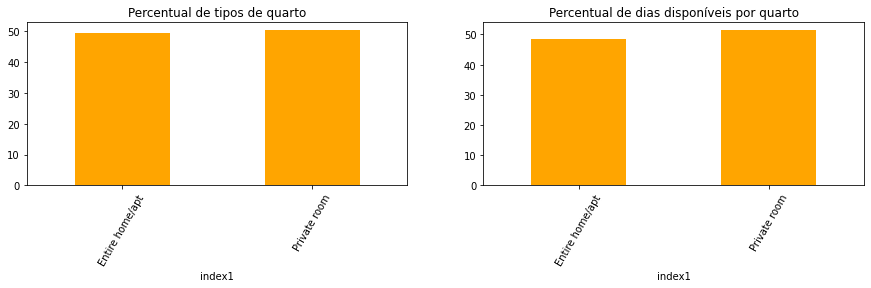

In [376]:
plt.rcParams['figure.figsize'] = (15,3)
plt.subplot(1,2,1)
plt.title('Percentual de tipos de quarto')
groupby_graph_sum(Staten_island_analysis['perc_room_type'],Staten_island_analysis['room_type'])


plt.subplot(1,2,2)
plt.title('Percentual de dias disponíveis por quarto')
groupby_graph_sum(Staten_island_analysis['perc_days'],Staten_island_analysis['room_type'])

In [377]:
Staten_island_analysis

,room_type,qty_room_type,available_days,room_available,perc_room_type,perc_days
0,Private room,55.00,9736.00,177.02,50.46,51.45
1,Entire home/apt,54.00,9188.00,170.15,49.54,48.55
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


# Distribuição das propriedades

De acordo com a distribuição das propriedades abaixo, é possível verificar que a maior concentração das casas, concentra na mesma região, os maiores preços.

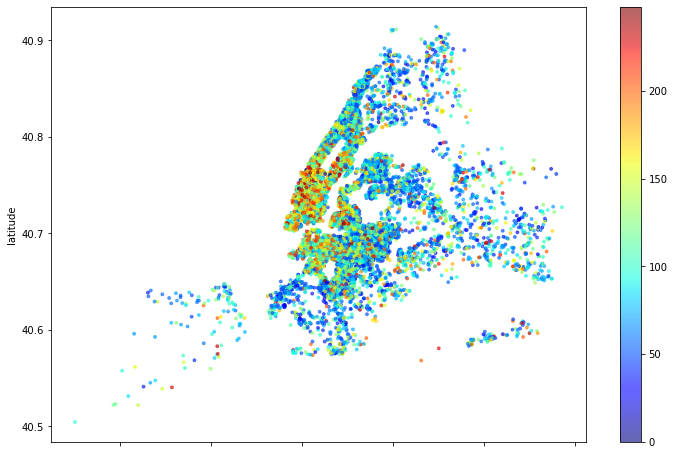

In [378]:
data_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6, c=data_clean['price'], s=8,
                cmap=plt.get_cmap('jet'), figsize=(12,8));

# Resultados e discussões

Conforme analisado, há concentração de imóveis nas regiões de Manhattan e Brooklyn, por essa razão, essas duas regiões estão com a maior concentração de preços. Além disso, ambas as regiões possuem todos os tipos de quarto informados no dataframe e os tipod de quartos mais disponibilizados são apartamentos e quartos privados.

Analisando o percentual de dias disponíveis para locação dos imóveis, percebe-se que no Brooklyn, quartos do tipo apartamento possuem um percentual menor de dias disponíveis para locação em relação ao quarto privado. Já na região de Manhattan, imóveis do tipo privado possuem um percentual menor de dias disponíveis para locação em relação aos apartementos. Contudo, analisando esses dados não é possível afirmar se essa menor disponibilidade dos imóveis na região estão diretamente ligadas a preferência das pessoas por cada tipo de imóvel ou se é devido ao fato da oferta de cada um nessas regiões (hipótese mais provável).

Uma observação a ser feita, também, é que apesar da região de Manhattan oferecer o maior número de imóveis na cidade de Nova York, ela também concentra maiores preços, podendo esse ser um indicativo de que a região é a mais procurada por locatários do que outras. Essa hipótese, além dos dados, é reforçada pelos diversos pontos turísticos presentes na região, como o Rockfeller Center, Wall Street, Times Square, Central Park e muitos outros.

De acordo com tudo o que foi analisado, uma futura pesquisa pode ter um foco em coletar os dados relacionados aos clientes, ou seja, dados sobre um grupo de pessoas que alugaram os imóveis na cidade de Nova York. Uma variável interessante seria o período no qual foi alugado, pois, poderíamos realizar uma análise temporal das alocações, identificando se há picos de procura sazonais, afirmar com maior precisão a preferência dos clientes e cruzar esses dados com as análises anteriores.

# Conclusão

A análise exploratória dos dados realizada nesse trabalho teve por objetivo tirar informações estatísticas do conjunto de dados apresentado e gerar insights com relação aos inóveis disponíveis para locação na plataforma Airbnb, na cidade de Nova York. Apesar de haver algumas limitações com relação alguns dados, por exemplo, 25% dos dados de review e review por mês estarem ausentes e não haver dados referente ao período que ficou alugado e por qual cliente foi alugado, o trabalho realizado conseguiu gerar resultados interessantes e insights que podem ser muito bem aproveitados.

A constatação de uma região com maior número de imóveis, porém com maior concentração de preços, é um forte indicativo de maior procura, por isso, é uma região com oportunidades para negócios do tipo, porém, com grande concorrência. Além disso, há a possibilidade de realizar uma futura análise buscando outras variáveis com maior correlação, já que, conforme indicado pelo mapa de calor, a correlação das variáveis não são altas.